In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('/content/iris (1).xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

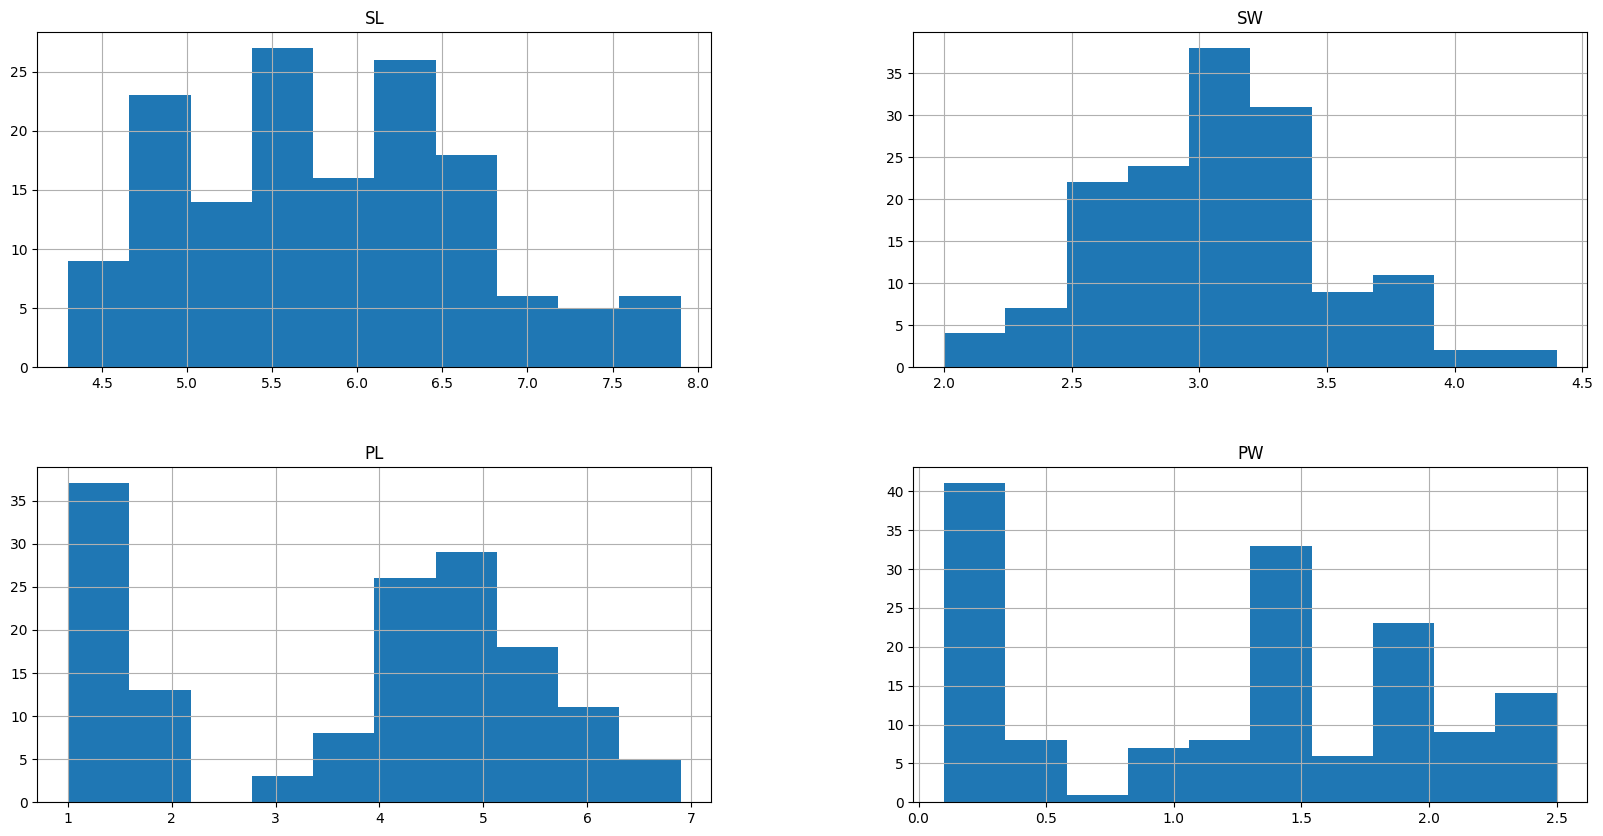

In [7]:
graphs = df.select_dtypes(include = ['int64', 'float64'])
graphs.hist(figsize= (20,10))
plt.show()

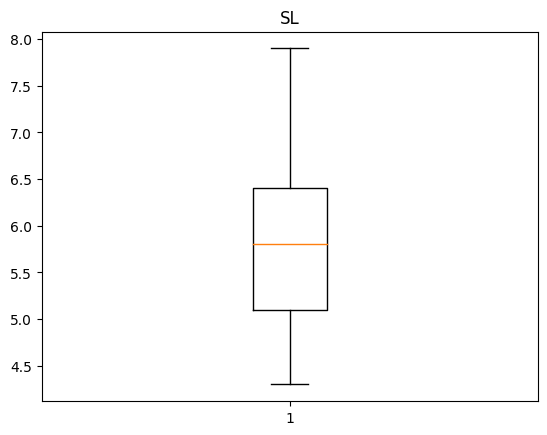

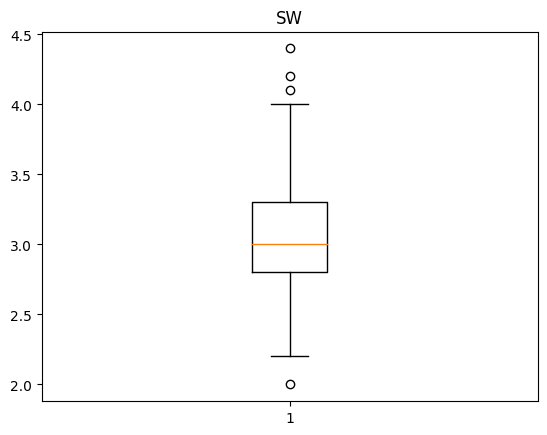

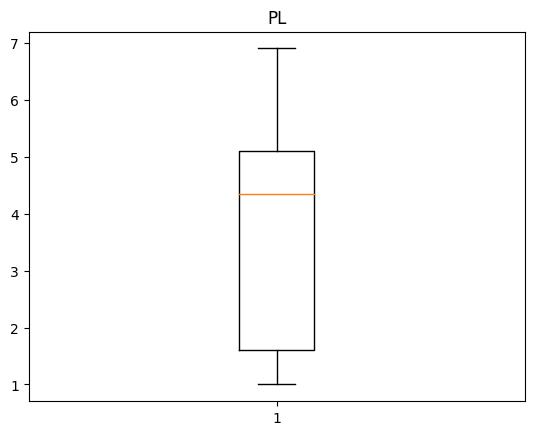

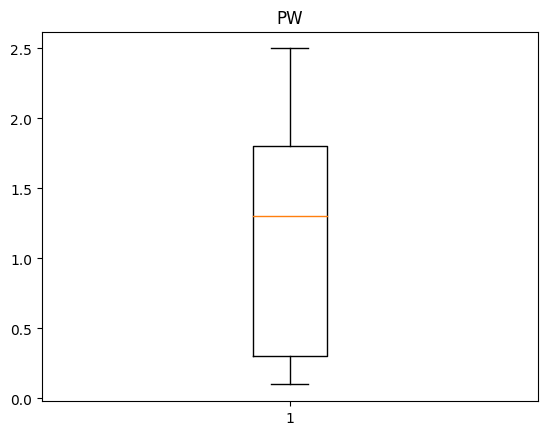

In [8]:
num_cols = df.select_dtypes(include = 'float64')
for i in num_cols:
        plt.boxplot(df[i])
        plt.title(f"{i}")
        plt.show()

In [9]:
def iqr_clipping(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=low_lim, upper=up_lim)
    return data

columns = ['SW']
df1 = iqr_clipping(df, columns)

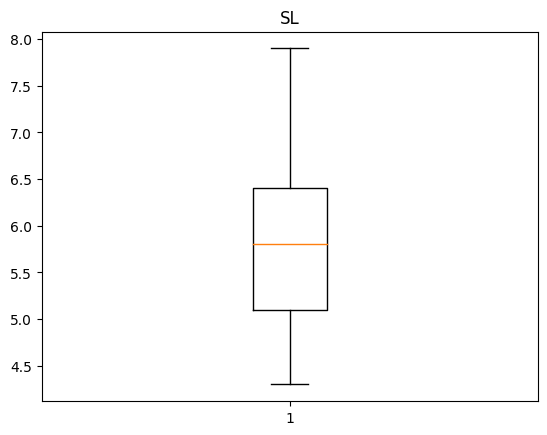

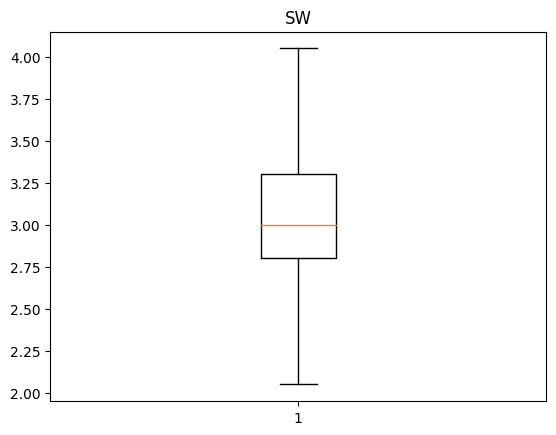

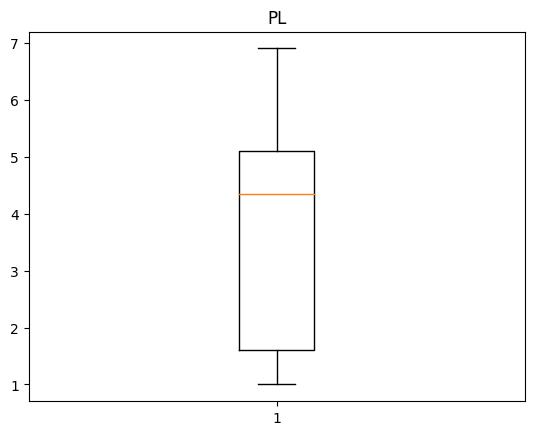

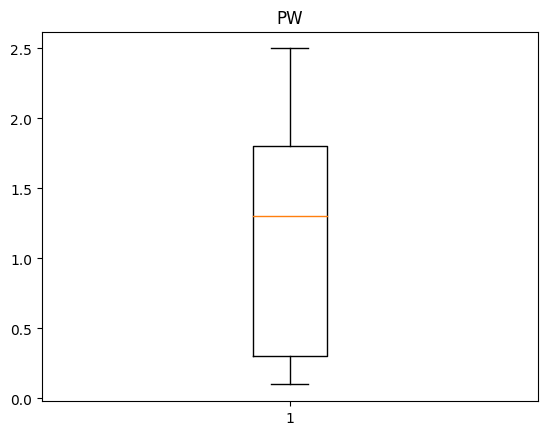

In [10]:
num_cols = df1.select_dtypes(include = 'float64')
for i in num_cols:
        plt.boxplot(df[i])
        plt.title(f"{i}")
        plt.show()

In [11]:
le = sk.LabelEncoder()
df1['Classification'] = le.fit_transform(df1['Classification'])

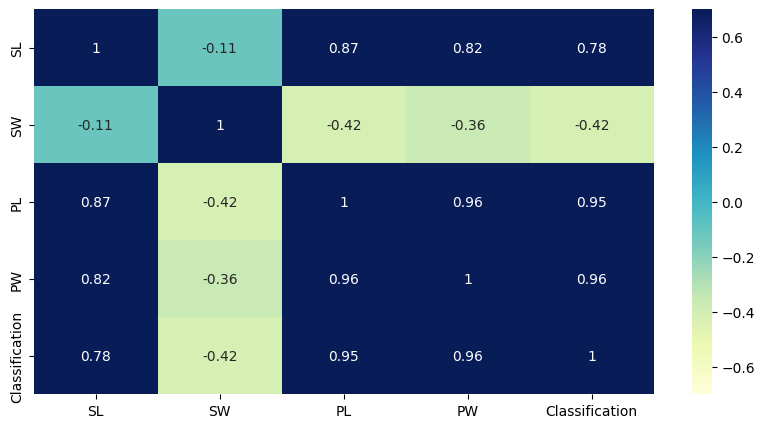

In [12]:
plt.subplots(figsize =(10,5))
sns.heatmap(df1.corr(), vmin = -0.7, vmax = 0.7, annot = True, cmap = 'YlGnBu')
plt.show()

In [13]:
df1.drop(['PL', 'SW', 'SL'], axis = 1, inplace = True)

In [14]:
y = df1['Classification']
x = df1.drop('Classification', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
lr = LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print("MSE is : ", mean_squared_error(y_test, predictions))

MSE is :  0.0334711974552147
